Current working dir: C:\Users\antalb\PycharmProjects\SVM\Notebooks


,BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR,BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha,BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1,BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I,BrEPI_IL-1b/TNF-a/IFN-g_24:SRB,BrEPI_IL-1b/TNF-a/IFN-g_24:tPA,BrEPI_IL-1b/TNF-a/IFN-g_24:uPA,...,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:HLA-DR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:IL-6,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:LDLR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:M-CSF,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Proliferation,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Serum Amyloid A,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:SRB
0,-0.014481,0.061243,0.014708,0.012421,-0.032603,-0.034311,-0.052341,0.029572,0.012267,0.024161,...,0.025944,0.018902,0.017714,-0.060988,-0.021278,-0.035478,0.038823,0.012433,-0.028409,-0.033973
1,-0.021816,-0.023754,0.014557,0.017318,0.036700,-0.002771,-0.045055,0.017222,0.031638,0.007116,...,-0.032905,0.018837,-0.008634,0.018944,0.020075,0.003304,-0.043806,0.033812,-0.030109,-0.024401
2,-0.053004,0.012351,0.011258,-0.060862,0.001146,-0.027279,0.017194,-0.026298,0.023165,-0.013152,...,0.052032,-0.010717,-0.031641,0.061327,-0.010797,0.043100,0.049570,0.035597,-0.034533,-0.008944
3,0.040528,-0.024877,-0.020954,0.007151,0.041339,0.019552,0.008298,-0.032532,0.013953,0.056905,...,0.006817,0.009221,-0.005250,-0.036120,-0.021653,0.023815,-0.051921,-0.038715,-0.076272,-0.035750
4,0.041027,0.027673,-0.001637,-0.050633,-0.000795,-0.002646,-0.038706,-0.005342,-0.012313,0.013453,...,-0.022662,0.037148,0.029425,0.010515,0.019820,-0.004762,-0.022110,-0.017277,0.028983,0.019645
5,0.033654,0.039353,-0.025918,-0.000702,-0.041935,0.004940,-0.006925,0.031311,-0.018087,-0.044466,...,-0.004553,-0.012104,0.005463,-0.060460,0.071321,0.044906,0.021187,0.003640,-0.031999,0.024426
6,0.021322,-0.045844,0.026053,0.040607,0.042632,0.022513,0.013433,-0.006603,0.052499,0.042507,...,-0.000989,-0.019955,-0.002668,0.068731,-0.001110,-0.015817,0.014263,-0.026204,-0.071255,-0.028888
7,-0.042931,-0.047299,-0.022898,0.017736,-0.030151,-0.015393,0.046996,-0.002103,0.020328,-0.038050,...,0.013266,-0.021689,-0.026004,-0.049704,-0.038193,-0.031339,-0.033512,-0.021671,-0.054873,0.030884
8,-0.048449,0.003331,-0.005681,0.060731,-0.036771,-0.010188,0.055604,0.029518,0.038467,-0.028112,...,-0.014562,0.003595,0.026543,0.017788,-0.057596,0.040623,0.013655,-0.016648,-0.060602,0.022887
9,0.013859,0.004547,0.024973,0.036334,-0.033014,-0.018779,-0.029789,0.019701,-0.056592,0.008116,...,-0.034540,-0.003926,-0.023452,-0.046335,-0.000245,-0.007488,0.044355,-0.013876,0.013539,0.010295


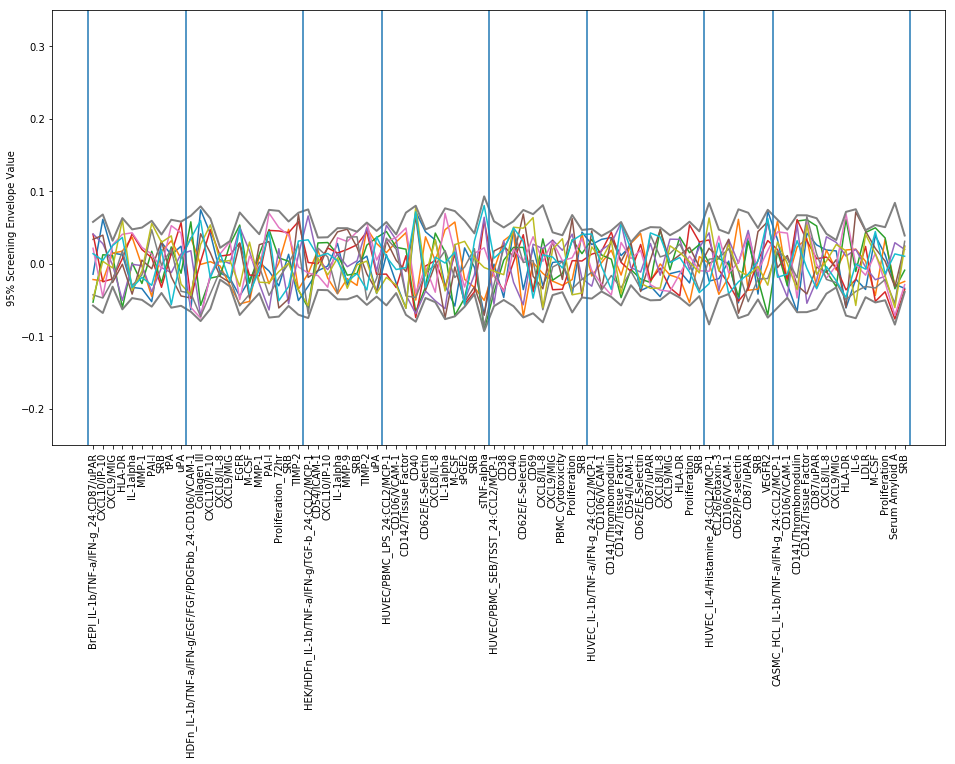

In [9]:
import numpy as np
import pandas as pd
from random_profiles import RandomProfileGenerator
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
import os
print("Current working dir: {}".format(os.getcwd()))

# Initialize the random profile genearator with sig env values and profile data file for S:M
rpg = RandomProfileGenerator(envelope_file='SigEnvelopeFile.xml', data_file='SVMData.xlsx')

envelope=RandomProfileGenerator.TRUSTED 
conf=RandomProfileGenerator._95
rp_df = rpg.get_random_profiles(prof_num=10, envelope=envelope,conf=conf, dist='rand')
screen_envelope = rpg.get_envelope(envelope=envelope,conf=conf)

plt.figure(figsize=(16,8))
display(rp_df)

#########################
## Plot Random Profiles #
#########################
system_markers = rp_df.columns.values
r_profiles = rp_df.values.tolist()
for row in r_profiles:
    # plt.scatter(x, r_profiles[rp], s=np.abs(5000*np.power(r_profiles[rp],2))) # plot controlling size
    plt.plot(range(len(row)), row) # plot controlling size
    

## Plot envelope
envelope_values = np.array([float(screen_envelope[sm]) for sm in system_markers])
x = range(len(envelope_values))
plt.plot(x, envelope_values, 
         x, -envelope_values, c='gray', linewidth=2)


x_labels = []
last_sys = ""
systems = []
v_line_positions = []

for i, sm in enumerate(system_markers):
    s,m = sm.split(':')
    #x_labels.append(m)
    if (last_sys != s):
        x_labels.append("{}:{}".format(s,m))            
        last_sys = s
        systems.append(s)
        v_line_positions.append(i)
    else:
        x_labels.append(m)
            
    
v_line_positions.append(len(system_markers))


plt.xticks(x, x_labels, rotation='vertical');
plt.ylabel('95% Screening Envelope Value');
plt.ylim(-0.25,0.35)

# add vertical lines
for lp in v_line_positions:
    plt.axvline(x=lp-0.5)